# Digital Phase Locked Loop Model

Type 2 digital phase locked loop frequency response and stability model.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

Set loop gain parameters: Phase detector $k_p$, DCO $k_d$, proportional $k_1$, and integral $k_2$.

Set loop delay $D$ and calculate total proportional gain $k$.

In [2]:
f_s, f_clk = 44.1e3, 50e6
k_p, k_d = 2**8,  f_s / f_clk
k_1 = 2**-6
k_2 = 2**-13
D = 1
k = k_p * k_1 * k_d

Define open and closed loop transfer functions,

$G(z)=\frac{kz^{-D}(1-z^{-1}+k_2z^{-1})}{(1-z^{-1})^2}$

$H(z)=\frac{G(z)}{1+G(z)}=\frac{kz^{-D}(1-z^{-1}+k_2z^{-1})}{(1-z^{-1})^2+kz^{-D}(1-z^{-1}+k_2z^{-1})}$

In [3]:
G = lambda z : k * z**-D * (1 - z**-1 + k_2 * z**-1) / (1 - z**-1)**2
H = lambda z : G(z) / (1 + G(z))

Calculate poles and zeros of $H(z)$,

$z_p=1-\frac{k}{2}\pm\frac{k}{2}\sqrt{1-\frac{4k_2}{k}}$

$z_z=1-k_2$

In [4]:
z_p0 = 1 - k / 2 + (k / 2) * np.emath.sqrt(1 - 4 * k_2 / k)
z_p1 = 1 - k / 2 - (k / 2) * np.emath.sqrt(1 - 4 * k_2 / k)
z_z = 1 - k_2

 Define complex frequency variable, $Z(f)=e^{2\pi i\frac{f}{f_s}}$

In [5]:
Z = lambda f : np.exp(2 * np.pi * 1j * f / f_s)

Plot frequency response and pole zero diagram.

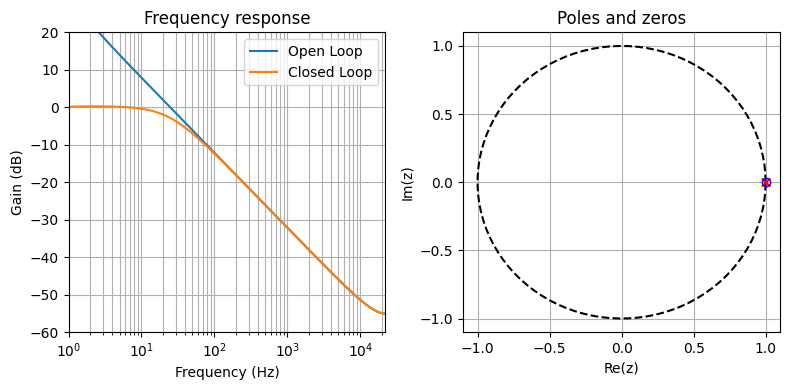

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

f = np.logspace(0, np.log10(f_s / 2), 100)
axes[0].semilogx(f, 20 * np.log10(np.abs(G(Z(f)))))
axes[0].semilogx(f, 20 * np.log10(np.abs(H(Z(f)))))
axes[0].set_xlim((1, f_s / 2))
axes[0].set_ylim((-60, 20))
axes[0].xaxis.grid(True, 'both')
axes[0].yaxis.grid(True)
axes[0].set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Gain (dB)')
axes[0].set_title(f'Frequency response')
axes[0].legend(('Open Loop', 'Closed Loop'))

theta = np.linspace(0, 2 * np.pi, 100)
axes[1].plot(np.cos(theta), np.sin(theta), 'k--',
             np.real(z_p0), np.imag(z_p0), 'rx',
             np.real(z_p1), np.imag(z_p1), 'rx',
             np.real(z_z), np.imag(z_z), 'bo', fillstyle='none')
axes[1].xaxis.set_ticks(np.linspace(-1.0, 1.0, 5))
axes[1].xaxis.grid(True)
axes[1].yaxis.set_ticks(np.linspace(-1.0, 1.0, 5))
axes[1].yaxis.grid(True)
axes[1].set_xlabel('Re(z)')
axes[1].set_ylabel('Im(z)')
axes[1].set_title(f'Poles and zeros')

fig.tight_layout()